# Buyer
## High budget, wants to show off, timing within a month, waterfront, renovated, high grades year

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [9]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
#df = df.astype({'sqft_basement': float})
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Hypothesis

- How many houses have waterfront? and how expensive are the houses with waterfront ? 
- Does higher grades have higher prices ?
- With resonable grade and waterfront, house can be bought 


In [69]:
df.query("bedrooms == 33")
df.drop(15856, axis=0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [11]:
# replacing the '?' with NaN
df['sqft_basement'] = df.sqft_basement.replace('?',np.NaN)
# now changing the data type from object/string to float
df = df.astype({'sqft_basement': float})
df.sqft_basement.dtypes

dtype('float64')

In [12]:
df.head()
df.shape

(21597, 21)

In [13]:
wf_list = df.where(df['waterfront']!= 0).sort_values('price', ascending = False)
wf_list

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9.808701e+09,2014-06-11,7060000.0,5.0,4.50,10040.0,37325.0,2.0,1.0,2.0,...,11.0,7680.0,2360.0,1940.0,2001.0,98004.0,47.6500,-122.214,3930.0,25449.0
1313,7.558700e+09,2015-04-13,5300000.0,6.0,6.00,7390.0,24829.0,2.0,1.0,NaN,...,12.0,5000.0,2390.0,1991.0,0.0,98040.0,47.5631,-122.210,4320.0,24619.0
1162,1.247600e+09,2014-10-20,5110000.0,5.0,5.25,8010.0,45517.0,2.0,1.0,4.0,...,12.0,5990.0,2020.0,1999.0,0.0,98033.0,47.6767,-122.211,3430.0,26788.0
8085,1.924059e+09,2014-06-17,4670000.0,5.0,6.75,9640.0,13068.0,1.0,1.0,4.0,...,12.0,4820.0,4820.0,1983.0,2009.0,98040.0,47.5570,-122.210,3270.0,10454.0
2624,7.738501e+09,2014-08-15,4500000.0,5.0,5.50,6640.0,40014.0,2.0,1.0,4.0,...,12.0,6350.0,290.0,2004.0,0.0,98155.0,47.7493,-122.280,3030.0,23408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21592,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21593,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21594,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
wf1_list = wf_list.query('waterfront == 1.0')

In [15]:
wf1_list.shape

(146, 21)

In [16]:
test_list = wf_list.dropna(subset = ['waterfront'])

# Plots

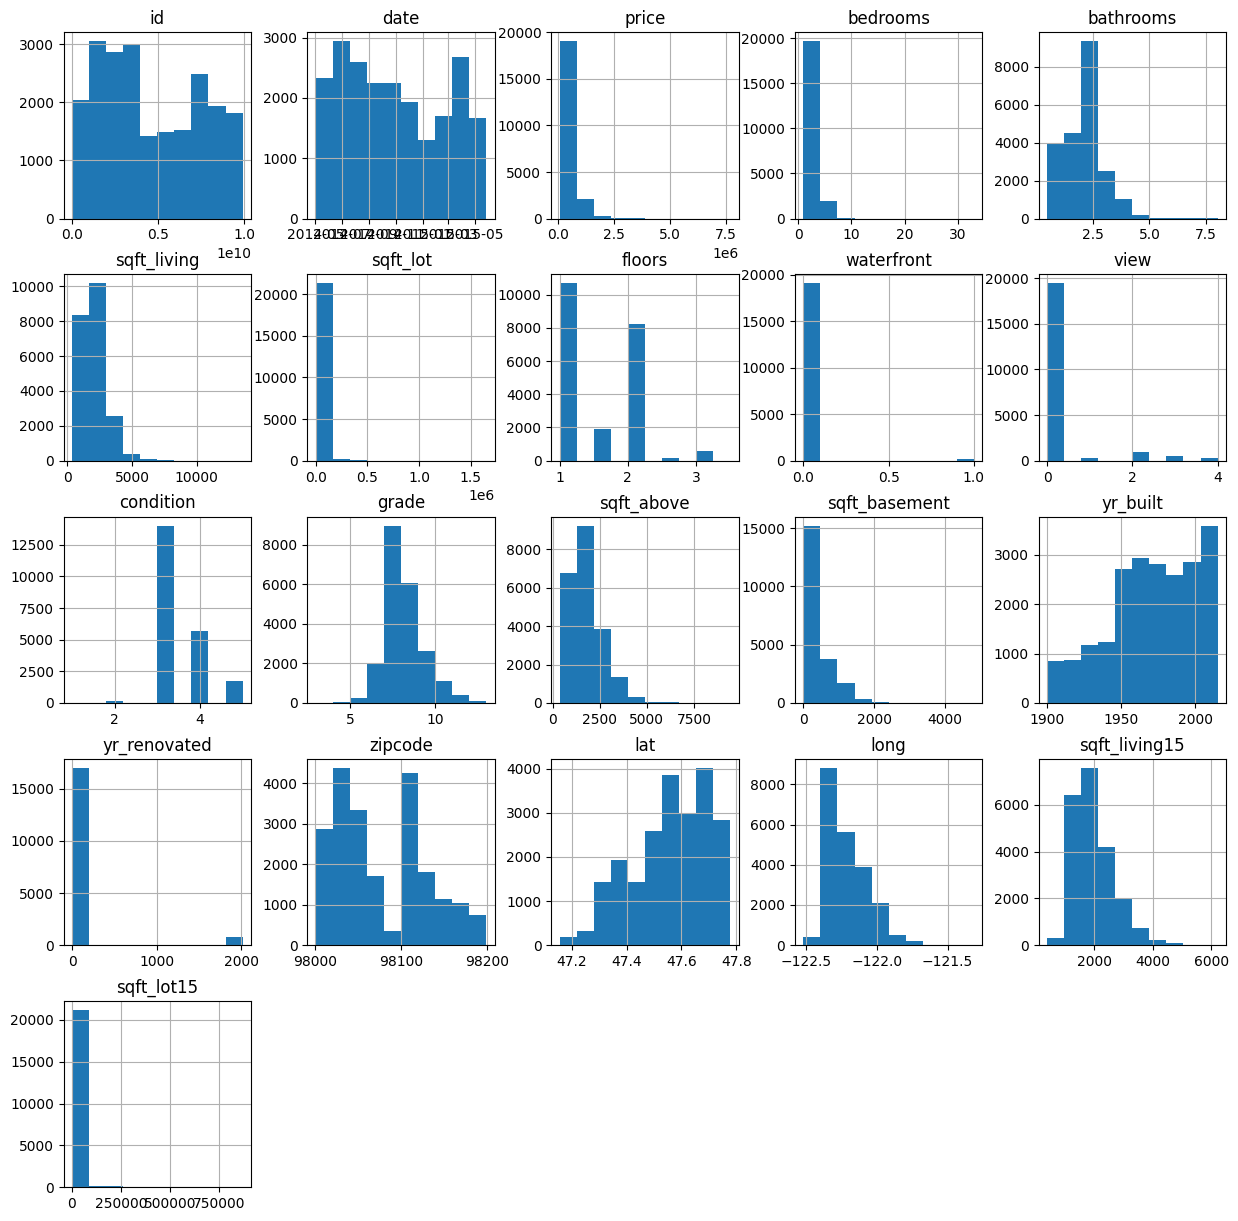

In [17]:
df.hist(figsize=(15,15))
plt.show()

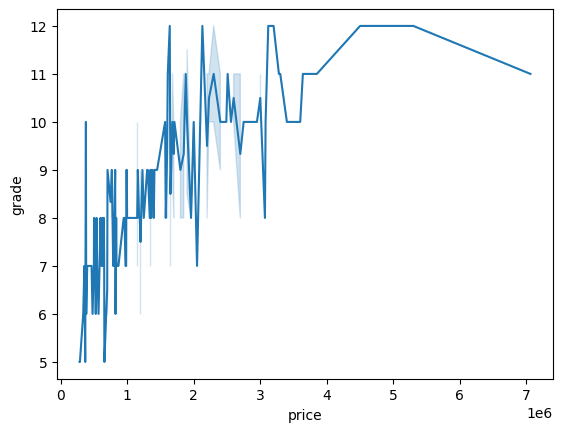

In [18]:
sns.lineplot(data=wf1_list, x="price", y="grade");

In [19]:
#wf1_list[['price,yr_renovated']].groupby(['price','yr_renovated']).size()
#wf1_list.yr_renovated
wf1_list = wf1_list.astype({'yr_renovated': int})
wf1_list.yr_renovated.dtypes

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
sns.barplot(data=wf1_list, x="yr_renovated", y="price");
plt.xticks(rotation=30);

In [ ]:
sns.barplot(data=wf1_list, x="date", y="price");

In [60]:
import plotly.express as px

In [ ]:
fig = px.scatter_geo(df, lat ='lat',lon='long', hover_name="price", color = 'waterfront')
fig.update_layout(title = 'Total data of price with waterfront', title_x=0.5)
fig.show()

In [ ]:
fig = px.scatter_geo(wf1_list, lat ='lat',lon='long', hover_name="waterfront", color = 'grade', size = 'price')
fig.update_layout(title = 'Prices of the houses with grade', title_x=0.5)
fig.show()

In [ ]:
# correlation matrix between these variables
corr_columns=["price", "grade", "yr_renovated","waterfront"]
corr_mtrx=df[corr_columns].corr()
corr_mtrx

In [ ]:
wf2 = wf1_list.dropna(subset=['yr_renovated'])


In [ ]:
wf2[['date','yr_renovated']].sort_values('yr_renovated',ascending=False).head(20)

In [ ]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

In [20]:
#df = df.eval("price_per_sqft_of_living_space = price/(sqft_living + sqft_lot)").round(2)
# creating a DataFrame with the avarage price_per_square_living grouped by zipcode for mapping to get a better overview
df_zipcode = df.groupby("zipcode").mean().sort_values("price_per_sqft_of_living_space").reset_index()
# import new data to get the district name for every zip code
#zip_name= pd.read_excel("data/zip_code_names.xlsx")
# join the new df to the zipcode df
#df_zipcode = pd.merge(zip_name,df_zipcode,how="inner",on="zipcode")
# check if everything works
df_zipcode

KeyError: 'price_per_sqft_of_living_space'

In [ ]:
df

In [ ]:
df.columns
type(df['zipcode'][0])

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(data=df, x = 'zipcode', y = 'price')
#sns.barplot(x = 'zipcode', y= 'price', data = df, palette = 'viridis',ci = False)

In [62]:
map1 = px.scatter_mapbox(df, lat="lat", lon="long", hover_name="id")# , color="central")
map1.update_layout(mapbox_style="open-street-map", title="Central Zipcodes", \
                height=500, width=600,\
                legend_traceorder="reversed")
map1.update_geos(fitbounds="locations")
map1.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'].str.strip(), format='%m/%d/%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

all_zips_list = df.zipcode.to_list()
all_zips_list = [str(zc) for zc in all_zips_list]
df['zipcodestr'] = all_zips_list

In [23]:
zipcodes = df.zipcode.astype(int).unique()
df.zipcode.nunique()

70

In [24]:
# create a dataframe with only the needed rows
df_months = df[['date','price','zipcode']].copy()
#normalize day to the beginning of month.
df_months['YearMonth'] = df_months['date'] + pd.offsets.MonthBegin(1)
df_months['YearMonth'] = df_months['date'].map(lambda dt: dt.replace(day=1))
df_months.drop('date',axis=1, inplace=True)
df_months



,price,zipcode,YearMonth
0,221900.0,98178,2014-10-01
1,538000.0,98125,2014-12-01
2,180000.0,98028,2015-02-01
3,604000.0,98136,2014-12-01
4,510000.0,98074,2015-02-01
...,...,...,...
21592,360000.0,98103,2014-05-01
21593,400000.0,98146,2015-02-01
21594,402101.0,98144,2014-06-01
21595,400000.0,98027,2015-01-01


In [56]:
for zipcode in zipcodes:
    #Create temporary dataframe with transactions at a certain zipcode
    df_temp = df_months[df_months['zipcode']== zipcode].copy()
    #Get median value of the transactions per month. Median values are used to offset outlier effects.
    df_temp = df_temp.groupby('YearMonth').price.median()
len(df_temp)

11

In [57]:
deltas_dict = {}
for zipcode in zipcodes:
    #Create temporary dataframe with transactions at a certain zipcode
    df_temp = df_months[df_months['zipcode']== zipcode].copy()
    #Get median value of the transactions per month. Median values are used to offset outlier effects.
    df_temp = df_temp.groupby('YearMonth').price.median()
    #Create a list to store month to month price changes.
    month_delta = []
    for i in range(len(df_temp)-1):
        #Calculate month to month change in median prices.
        delta = (df_temp[i+1]- df_temp[i])/df_temp[i]
        month_delta.append(delta)
    month_delta = np.array(month_delta)
    #Calculate monthly average price change as percentage.
    delta = round(month_delta.mean()*100,2)
    deltas_dict[zipcode] = delta
#Create dataframe 
df_deltas = pd.DataFrame.from_dict(deltas_dict,orient='index', columns=['m_delta'])
#Top 5 zipcodes.
print('The top 5 zipcodes are: ', list(df_deltas.sort_values('m_delta', axis=0, ascending=False).index[:5]))
df_deltas.sort_values('m_delta', axis=0, ascending=False).head()

The top 5 zipcodes are:  [98024, 98014, 98112, 98006, 98022]


,m_delta
98024,9.83
98014,6.62
98112,6.43
98006,5.05
98022,4.81


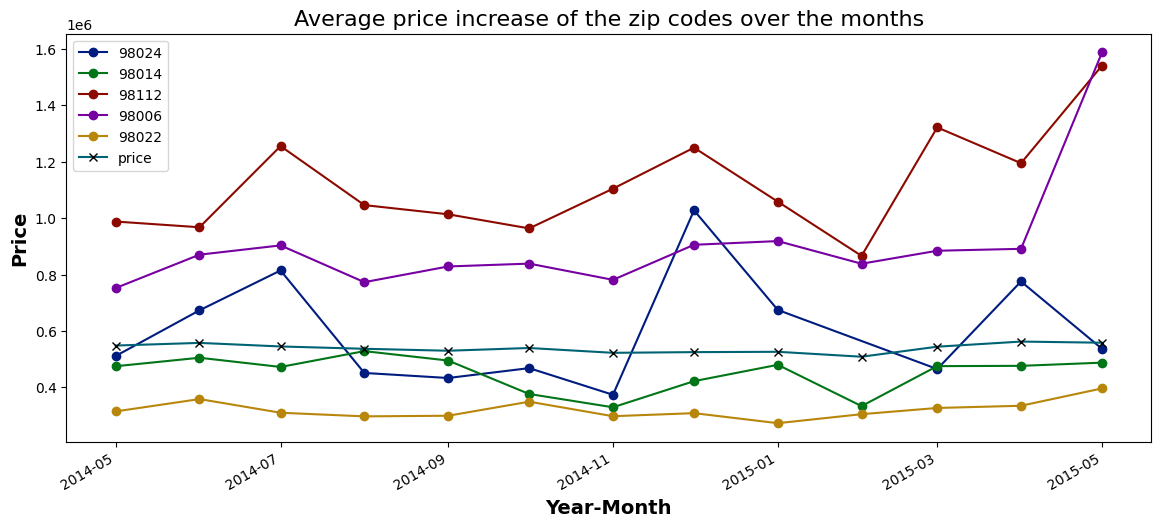

In [58]:
plt.style.use('seaborn-dark-palette')
#Create list of top 5 zipcodes
top5_zip= list(df_deltas.sort_values('m_delta', axis=0, ascending=False).index[:5])
#Create figure 
fig = plt.figure(figsize=(14,6))
for zipcode in top5_zip:
    df_temp = df_months[df_months['zipcode']== zipcode].copy()
    df_temp = df_temp.groupby('YearMonth').price.mean()
    df_temp.plot(label=zipcode, legend=True,marker="o")
df_temp = df_months.groupby('YearMonth').price.mean()

#label = ["Fall City","Carnation","Bellevue","Seattle","Enumclaw","All"]

df_temp.plot(legend=True,marker="x",mfc="pink",mec="black")
plt.title('Average price increase of the zip codes over the months',fontsize=16)
#plt.legend(label)
plt.xlabel('Year-Month', fontsize=14, fontweight="bold")
plt.ylabel('Price', fontsize=14,fontweight="bold")
plt.show();

	    zipcode	price	sqft_living	sqft_lot	last_registered_renovation	Quality	ranked
15678	98166	1640000.000	4660	21164	1990	High	1.000
5744	98155	1850000.000	3830	11972	1981	High	2.000
4214	98199	1880000.000	3280	29111	1925	High	3.000
3154	98166	1900000.000	3690	32044	1989	High	4.000
11390	98115	2300000.000	4110	15929	2001	High	5.000
4009	98075	2400000.000	3000	11665	2001	High	6.000
18440	98008	2700000.000	4420	7850	2001	High	7.000
14070	98008	3300000.000	6200	13873	1989	High	8.500
18185	98008	3300000.000	4220	41300	1987	High	8.500
8085	98040	4670000.000	9640	13068	2009	High	10.000
3910	98004	7060000.000	10040	37325	2001	High	11.000


        date	price	waterfront	grade	yr_built	yr_renovated	zipcode
15678	2014-12-01	1640000.000	1.000	12	1975	1990.000	98166
8085	2014-06-17	4670000.000	1.000	12	1983	2009.000	98040
3910	2014-06-11	7060000.000	1.000	11	1940	2001.000	98004
18185	2014-12-30	3300000.000	1.000	11	1958	1987.000	98008
2862	2014-11-18	3600000.000	1.000	10	1941	2002.000	98144
8775	2015-03-06	1800000.000	1.000	10	1933	1989.000	98006
17643	2014-10-30	820000.000	1.000	9	1976	1991.000	98198
1259	2014-06-25	995000.000	1.000	9	1968	1990.000	98166
3930	2014-07-23	1380000.000	1.000	9	1978	2006.000	98070
18707	2014-10-28	1230000.000	1.000	9	1974	1989.000	98198
6765	2014-06-24	2700000.000	1.000	9	1959	1980.000	98040
4758	2014-08-14	1850000.000	1.000	9	1963	2001.000	98075
18899	2015-04-08	1400000.000	1.000	8	1947	1984.000	98008
11103	2014-05-28	1180000.000	1.000	8	1937	1998.000	98136
14457	2014-08-22	600000.000	1.000	8	1965	1986.000	98070
5755	2014-07-17	1100000.000	1.000	8	1956	1991.000	98178
3249	2014-10-20	1000000.000	1.000	8	1939	1963.000	98006
9243	2014-10-13	1190000.000	1.000	8	1939	1984.000	98125
12447	2014-07-24	1900000.000	1.000	8	1942	1983.000	98144
9103	2015-02-24	1360000.000	1.000	8	1931	1991.000	98125
4365	2014-11-21	1150000.000	1.000	7	1925	1993.000	98023